In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

In [15]:
df=pd.read_csv('/Users/draculalemon/Documents/macbook file/csvfile/Mall_Customers.csv')

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df.shape

(200, 5)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

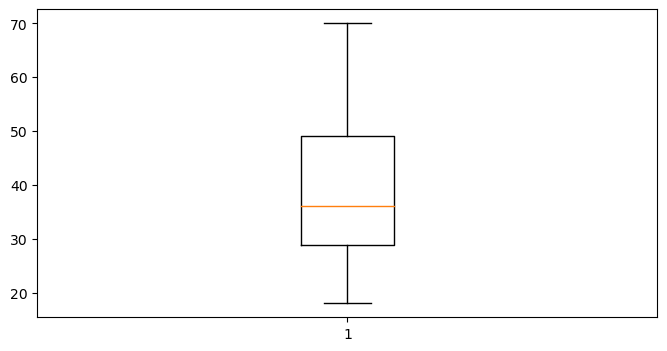

In [20]:
# checking if there is any outliers in the age columns using boxplot
plt.figure(figsize=(8,4))
plt.boxplot(x=df['Age'])
plt.show()

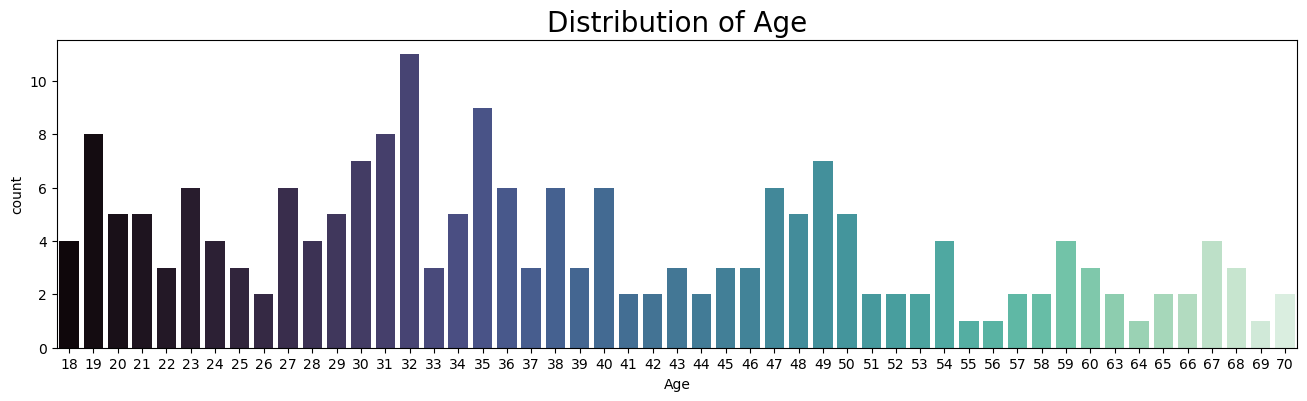

In [88]:
plt.figure(figsize=(16,4))
sns.countplot(df['Age'], palette = "mako")
plt.title('Distribution of Age', fontsize = 20)
plt.show()

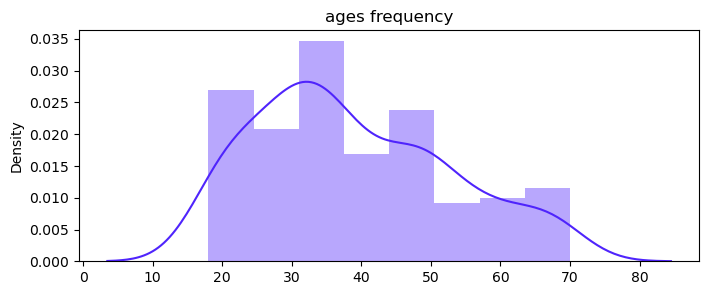

In [89]:
#plotting the age frequency of the cousteomer so we can see which age group are spending how much
plt.figure(figsize=(8,3))
plt.title('ages frequency')
sns.axes_style('dark')
sns.distplot(x=df['Age'],color='#4F24FC')
plt.show()

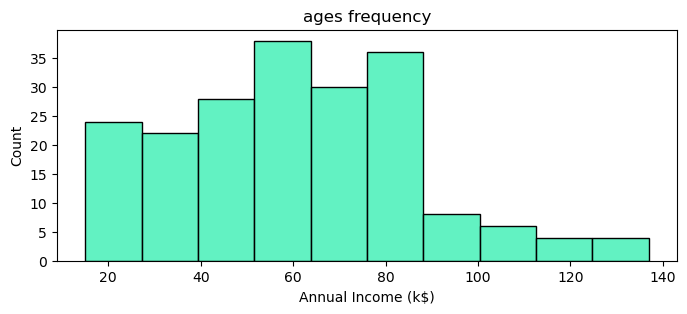

In [59]:
#plotting the age frequency of the cousteomer so we can see which age group are spending how much
plt.figure(figsize=(8,3))
plt.title('ages frequency')
sns.axes_style('dark')
sns.histplot(x=df['Annual Income (k$)'],color='#2EEEAE')
plt.show()

In [23]:
#defining bins for age and then grouping it with spending score
cut_bins=[18,27,36,45,55,64] 
df['Aggregate_Age']=pd.cut(df['Age'],bins=cut_bins)

as we can see from above graph that the max coustomer who is visiting the mall is 30 a followed by 20 age group people.

Text(0.5, 1.0, 'Spending score according to the Age Group')

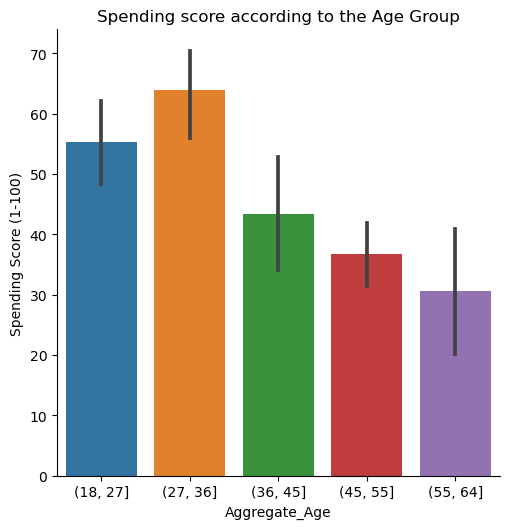

In [24]:
# cheking price according to the car type
sns.catplot(x=df['Aggregate_Age'],y=df['Spending Score (1-100)'],data=df.sort_values('Spending Score (1-100)',ascending=False),kind='bar')
plt.title('Spending score according to the Age Group')

The aggregate age group of 27-36 are having high spending score.


Text(0.5, 1.0, 'Age Group Having Higest Annual Income')

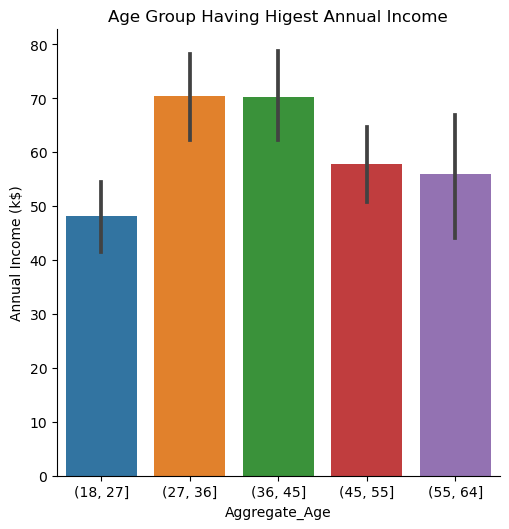

In [57]:
# cheking price according to the car type
sns.catplot(x=df['Aggregate_Age'],y=df['Annual Income (k$)'],data=df.sort_values('Annual Income (k$)',ascending=False),kind='bar')
plt.title('Age Group Having Higest Annual Income')

next plotting a box plot to see the spending score and annual income to better visualize the dstribution range. the range of spending is clearly surpassing the annual income range

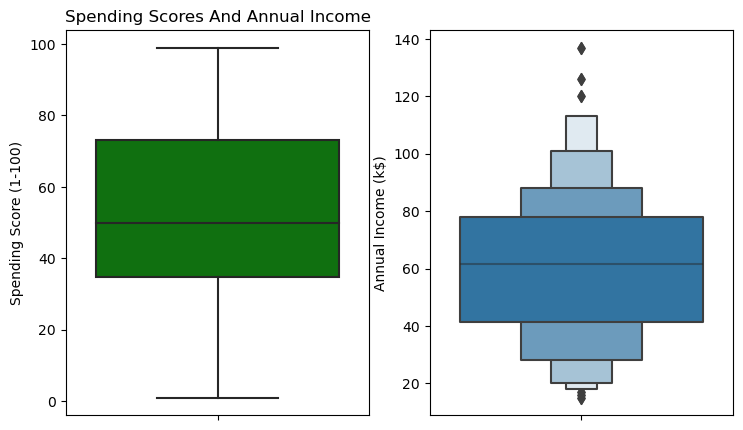

In [70]:
plt.figure(figsize=(18,5))
plt.subplot(1,4,1) 
sns.boxplot(y=df['Spending Score (1-100)'],color='green')
plt.title('Spending Scores And Annual Income')
plt.subplot(1,4,2)
sns.boxenplot(y=df['Annual Income (k$)'])
plt.show()

above here we are comparing the spending of the people with annual income.
and we can see that the spending are high than anuual income

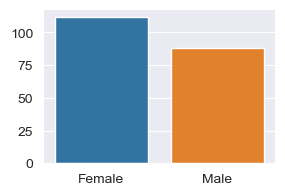

In [92]:
gender=df.Gender.value_counts()
sns.set_style('darkgrid')
plt.figure(figsize=(3,2))
sns.barplot(x=gender.index,y=gender.values)
plt.show()

from the above graph we can see that the Female are more frequent at the mall.

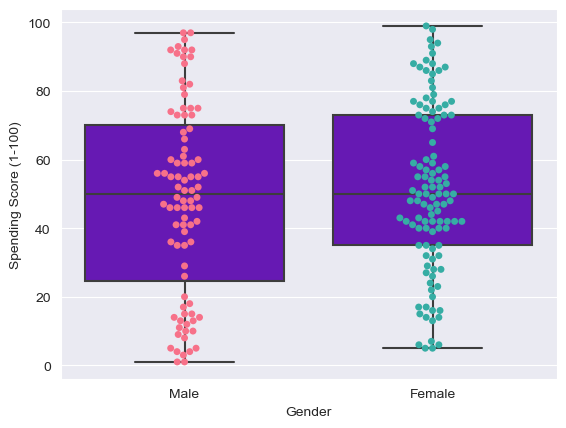

In [115]:
ax = sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df,color='#6600CC')
ax = sns.swarmplot(x="Gender", y="Spending Score (1-100)", data=df,palette='husl')

we can see the distribution of the spendig score based on Gender, seems Female are having more
spending score around 38-47 and male spending score is little high than female, around 55

#inferance 
female are more frequent but there spending score are little less than male.

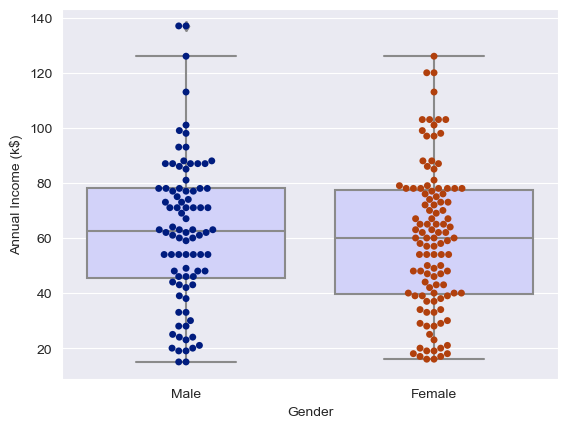

In [124]:
ax = sns.boxplot(x="Gender", y="Annual Income (k$)", data=df,color='#CCCCFF')
ax = sns.swarmplot(x="Gender", y="Annual Income (k$)", data=df,palette='dark')

female annual income are more cluttered around 40k-80k$, and male annual income are little distribute 
in different level, starting from 45k-85k$.

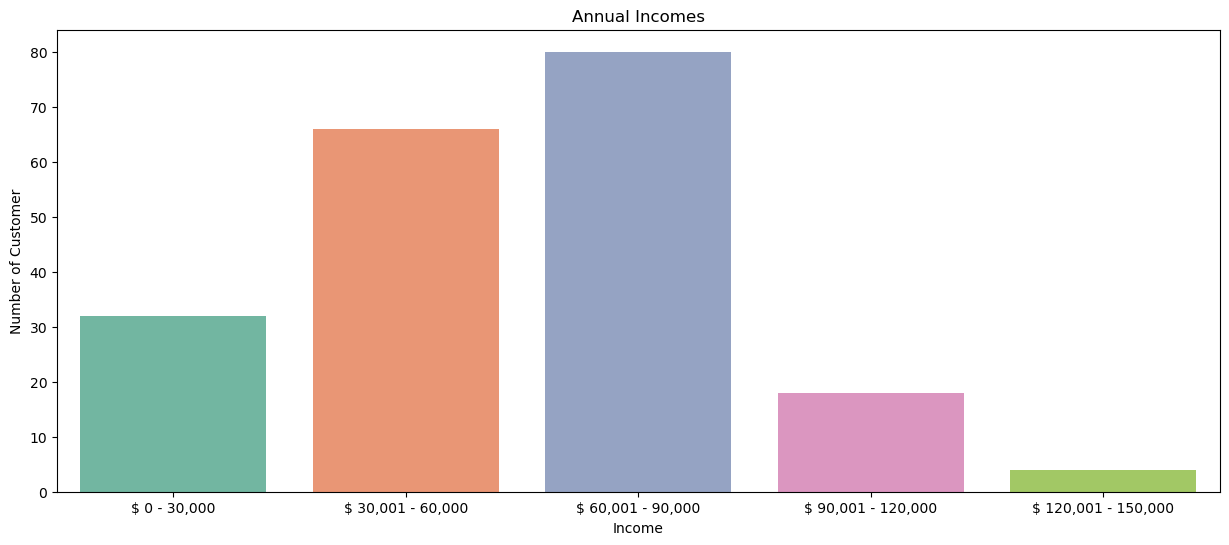

In [71]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

majority of the customer are having income range between 60k-90k$, so they are our target custome
as they are having higher income.

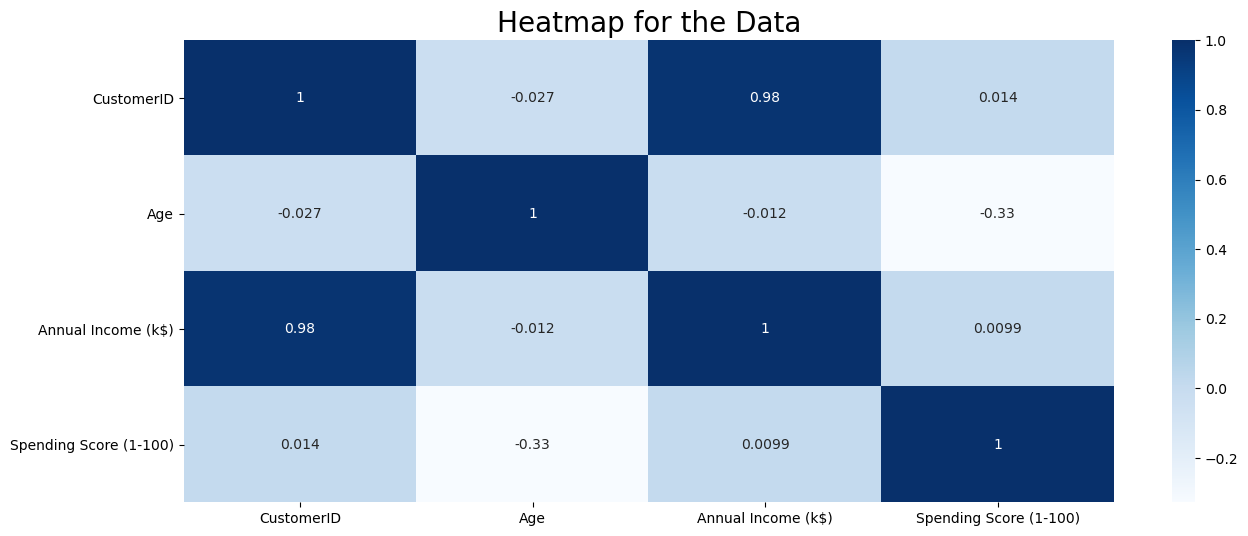

In [91]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

Text(0, 0.5, 'Spending Score ')

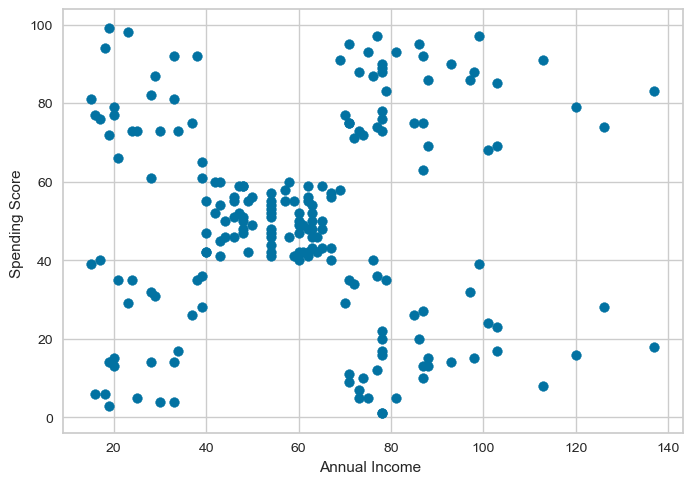

In [235]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income ')
plt.ylabel('Spending Score ')
#we visually see 5 clusters based on annual income and spendin score of a coustomer

In [127]:
from sklearn.cluster import KMeans
km=KMeans()

In [132]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Aggregate_Age
0,1,Male,19,15,39,"(18, 27]"
1,2,Male,21,15,81,"(18, 27]"
2,3,Female,20,16,6,"(18, 27]"
3,4,Female,23,16,77,"(18, 27]"
4,5,Female,31,17,40,"(27, 36]"


In [216]:
X=df.iloc[:, [2,3,4]].values

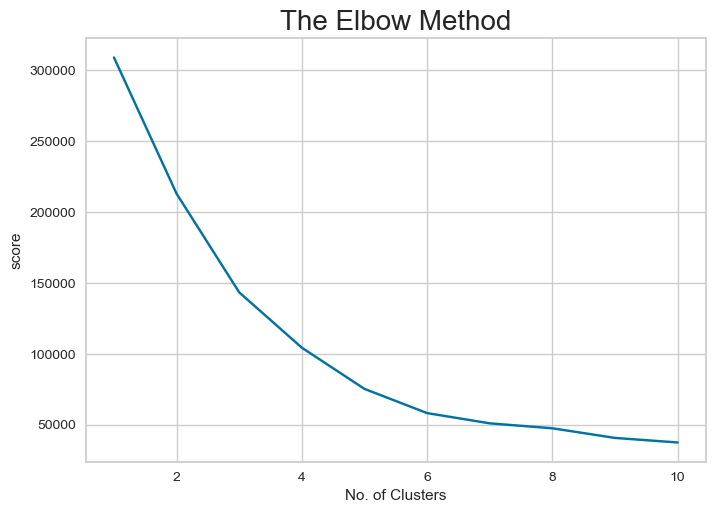

In [218]:
#choosing the best value for k
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('score')
plt.show()

The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually

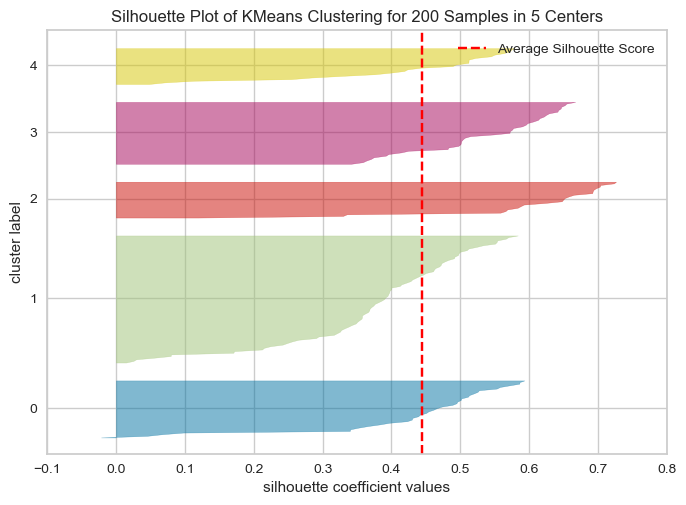

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [219]:
from yellowbrick.cluster import SilhouetteVisualizer

# Specify the features to use for clustering
X1 = df.drop('CustomerID',axis=1)

# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [227]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [228]:
df['cluster']=y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Aggregate_Age,cluster
0,1,Male,19,15,39,"(18, 27]",2
1,2,Male,21,15,81,"(18, 27]",4
2,3,Female,20,16,6,"(18, 27]",2
3,4,Female,23,16,77,"(18, 27]",4
4,5,Female,31,17,40,"(27, 36]",2


In [229]:
km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

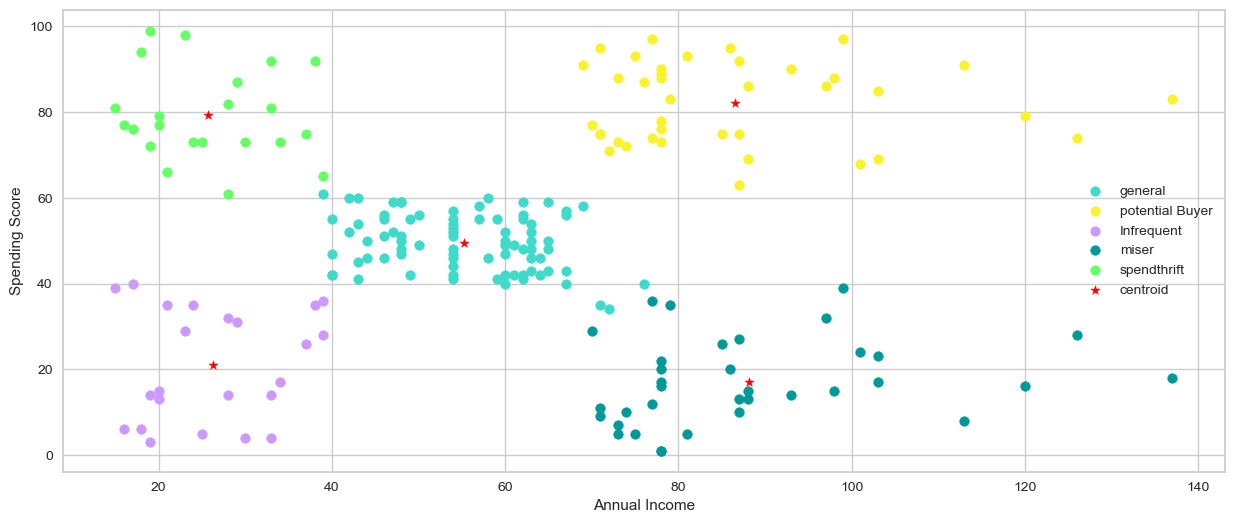

In [237]:
plt.figure(figsize=(15,6))
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='#40DACA',label='general')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='#F9F22C',label = "potential Buyer")
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='#CC99FF',label = "Infrequent")
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='#009999',label = "miser")
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='#66FF66',label = 'spendthrift')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='#FF0000',marker='*',label='centroid')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

In [ ]:
As we have describe the data into different cluster and its centroids,
* Infrequent are those buyers whos annual income are around 10k-40k and there spending score is also the same.
* Miser  are those customer whoe spend there money very wisely purchasing goods only if they find it worthy.
* General are those customer who are quite frequent and spend little more as compared to miser.
* potential Buyer are those having high Annual income and also high spending score.
* spendthrift are those whos annual income are far less than there spending score.

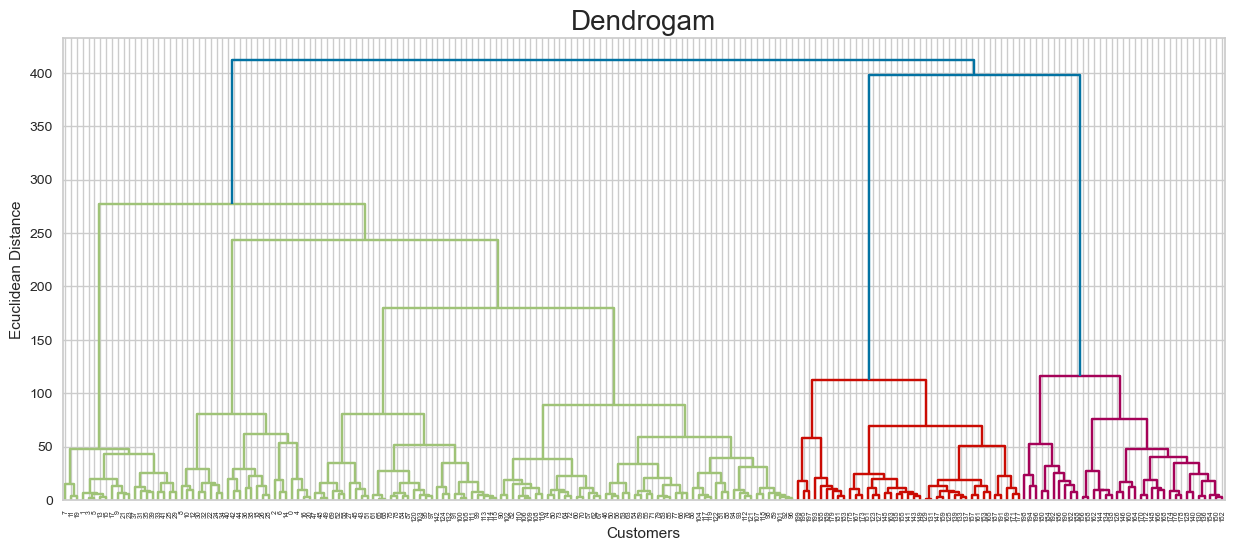

In [234]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

so according to the inference we can decide that the coustomer who has more purchasing power 
and also spending more  are the potential target coustomer for the mall.
so we can give more priority to those for there retention and also we can draw certain strategis for miser and general group of customer so they can also spend little more than usual.
so Mall can offer  them minimal discount or promo codes so they can increase there ability to spend more, and also giving certain non-monetary user experienced